<a href="https://colab.research.google.com/github/MuhammadMaazKhan/Machine-Learning/blob/main/7.Deep%20Learning/2.CNN/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

**Feature detector** kernel and filter are same thing
- **Small Matrix (Kernel/Filter)**: A feature detector is a small matrix (e.g., 3x3 or 5x5) that slides over the input image.
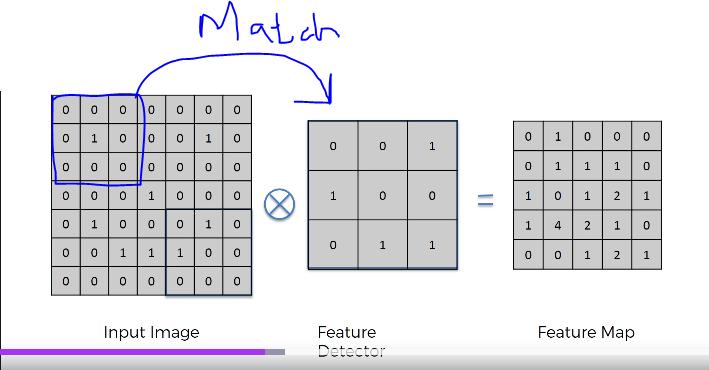



Why **ReLU** is Needed?
- Images contain highly non-linear features like borders, shadows, and textures.
- Convolution operations can create linear patterns, which ReLU helps break by ensuring only positive values are retained.
- The transformation **removes all negative values**, ensuring better feature detection.


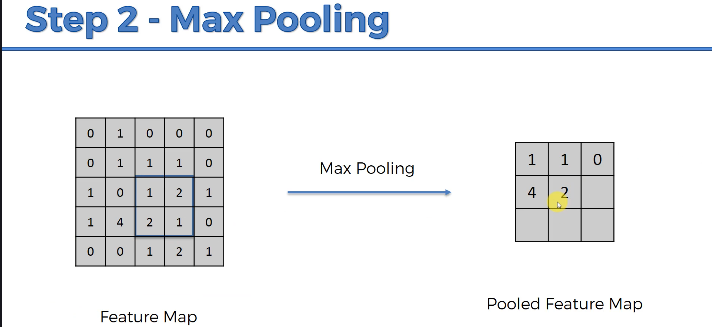

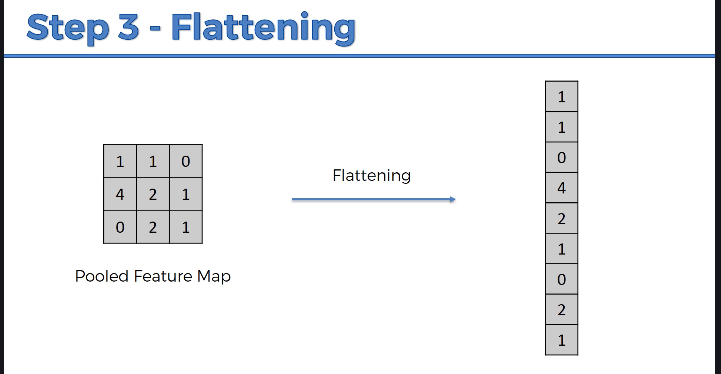

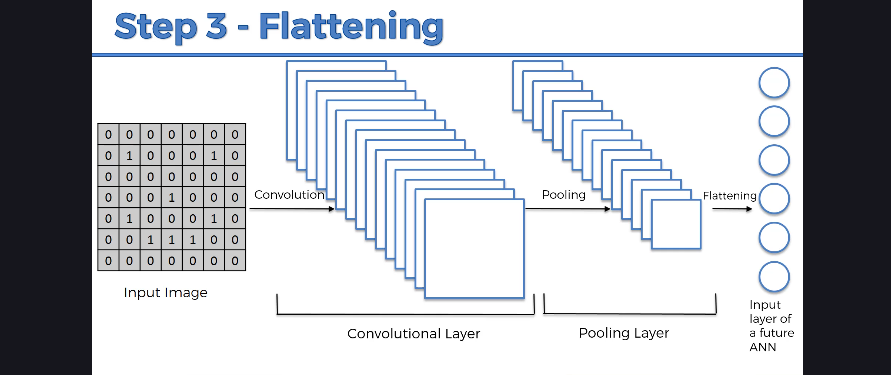

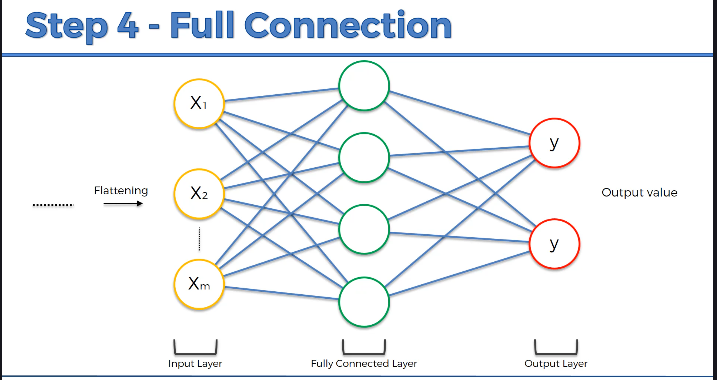

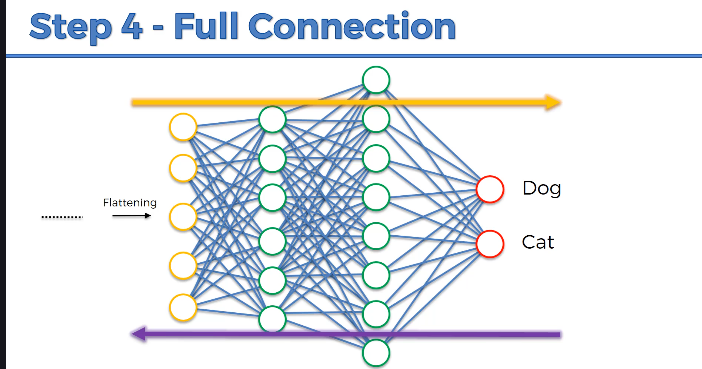

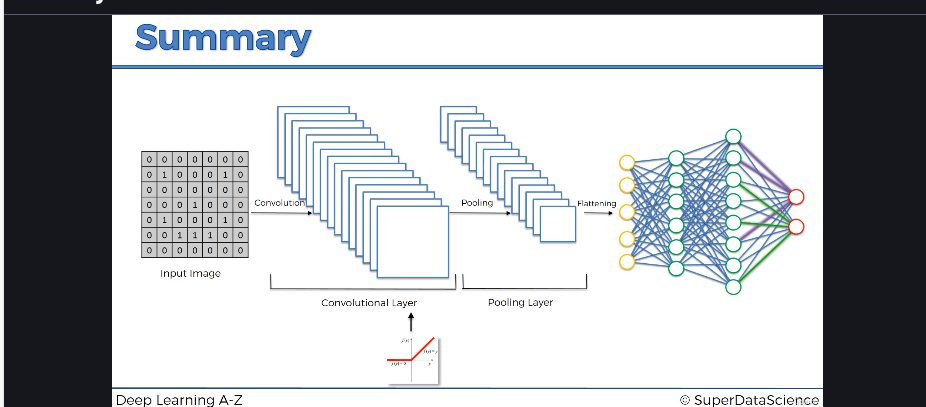

### **Summary: Important Processes in Convolutional Neural Networks (CNNs)**  

#### **1. Convolutional Layer (Feature Extraction)**
   - An **input image** undergoes a convolution operation.
   - **Feature detectors (filters)** slide across the image to create **feature maps**, highlighting key patterns like edges and textures.

#### **2. ReLU Activation (Non-Linearity)**
   - The **Rectified Linear Unit (ReLU)** function removes negative values to **introduce non-linearity**.
   - Helps the CNN recognize more **complex variations in image features**.

#### **3. Pooling Layer (Dimensionality Reduction & Invariance)**
   - **Max pooling** selects the most prominent features in an image, reducing its size.
   - Makes CNNs **robust to slight distortions, rotations, or shifts in images**.
   - Helps prevent **overfitting** by reducing excess information.

#### **4. Flattening (Vector Representation)**
   - Converts pooled feature maps into a **single long vector** to be fed into a neural network.
   - Prepares the image data for **classification**.

#### **5. Fully Connected Layer (Final Prediction)**
   - Processes extracted features using an **artificial neural network (ANN)**.
   - The final layer performs **classification**, deciding what category the image belongs to.

#### **6. Training Process (Optimization)**
   - **Forward propagation**: The network makes predictions.
   - **Backpropagation**: Adjusts weights using **gradient descent** to improve accuracy.
   - Iterative training through **epochs** refines CNN performance.
   - Both **network weights and feature detectors** are optimized for **best feature extraction**.



**Softmax** turns scores into probabilities.

**Cross-entropy** measures how good those probabilities are.

Together, they power classification tasks in deep learning, especially in CNNs.

Cross-entropy is preferred over MSE for classification due to better gradient behavior.

## Part 1 - Data Preprocessing

### Preprocessing the Training set

we will apply **some transformations**
on all the images of the training set.
The images of the training set only.
We won't apply these same transformations on the test set.

It is to avoid over fitting.Indeed, if we don't apply these transformationswell, when training our CNN on the training setwe will get a huge difference between the accuracy on the training set and the one on the test set you know
on the evaluation set,actually, we will get very high accuracies on the training set, you know,close to 98% and much lower accuracies on the test set and that is **called over fitting**


We're gonna do some horizontal flips.We're gonna do some zoom in and zoom out.Well, you know we're gonna apply a series of transformation so as to modify the images.all these transformations is **called Image Augmentation**





In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

color image thats why input_shape=[64, 64, 3]

black & white => input_shape=[64, 64, 1]

3 X 3 dimension => kernel_size = 3 **(Feature detector)**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

pool size =2 means left big box have small box **see pic above step 2**

strides = 2 means that shifting that small frame after every 2 pixels

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

we don't add input_shape=[64, 64, 3] because it is input pic on first layer this layer is connected to that


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

we're gonna choose a larger number of hidden neurons. We're gonna choose 128 hidden neurons. Better accuracy for complexity

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

Because this is output layer and we have only 2 inputs dogs and cats (binary) so for the final result i need only one neuron to encode 0  or 1 class (dog or cat)

for output layer activation should not be relu, as we are doing binary so sigmoid. But for multi-class we use softmax activation

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

An  **epoch** in deep learning refers to one complete cycle where the entire dataset is passed through the neural network for training.
**Why are Epochs Important?**
- During each epoch, the model learns by adjusting weights using backpropagation.
- Training too many epochs may cause overfitting (learning too much from training data but failing on new data).



In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

## Part 4 - Making a single prediction

- Converts the image into a NumPy array, which is needed for processing by TensorFlow.

- CNN models expect batches of images, not single images.
- np.expand_dims This adds an extra dimension, making it [1, 64, 64, 3] (batch size of 1, 64x64 pixels, 3 color channels RGB).

- class_indices Retrieves the dictionary mapping of class labels to indices (e.g., {'cats': 0, 'dogs': 1}).
- It helps interpret result.




In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [ ]:
print(prediction)